Mahsa Mssoud - 810196635
Q2 - hw2

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import itertools
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
import matplotlib.pyplot as plt

drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/sonar.all-data-2.csv')

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       208 non-null    float64
 1   2       208 non-null    float64
 2   3       208 non-null    float64
 3   4       208 non-null    float64
 4   5       208 non-null    float64
 5   6       208 non-null    float64
 6   7       208 non-null    float64
 7   8       208 non-null    float64
 8   9       208 non-null    float64
 9   10      208 non-null    float64
 10  11      208 non-null    float64
 11  12      208 non-null    float64
 12  13      208 non-null    float64
 13  14      208 non-null    float64
 14  15      208 non-null    float64
 15  16      208 non-null    float64
 16  17      208 non-null    float64
 17  18      208 non-null    float64
 18  19      208 non-null    float64
 19  20      208 non-null    float64
 20  21      208 non-null    float64
 21  22      208 non-null    float64
 22  23

In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.068

In [ ]:
df['class']

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: class, Length: 208, dtype: object

In [ ]:
x = df.drop('class', inplace=False, axis=1).values

# df = pd.DataFrame(x_scaled)
# df2['class'] = df['class']

In [ ]:
df['class']
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [ ]:
df2 = pd.DataFrame(x_scaled)
df2['class'] = df['class']

In [ ]:
df = df2
X = df.drop('class', inplace = False, axis = 1)
y = df['class']
ll = []
for i in range(len(y)):
    if y[i] == 'R':
        ll.append(1)
    else:
        ll.append(0)
y = ll
y = pd.Series(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

Training data shape :  (166, 60) (166,)
Testing data shape :  (42, 60) (42,)


In [ ]:
# model = Sequential()
# model.add(Dense(512, activation = 'relu', input_shape = (60,)))	
# model.add(Dense(512, activation = 'relu'))	
# model.add(Dense(2, activation = 'softmax')) 
# model.summary()

# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_split = 0.2) 	

NameError: ignored

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))	
model.add(Dense(512, activation = 'relu'))	
model.add(Dense(2, activation = 'softmax')) 
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 18, batch_size = 32, validation_split = 0.2) 	

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               31232     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/18
5/5 [==============================] - 1s 61ms/step - loss: 0.6866 - accuracy: 0.5297 - val_loss: 0.6079 - val_accuracy: 0.7353
Epoch 2/18
5/5 [==============================] - 0s 10ms/step - loss: 0.5611 - accuracy: 0.7493 - val_loss: 0.5888 - val_accuracy: 0.7059
Epoch 3/18
5/5 [==============================] - 0s 10ms/step - loss: 0.5044 - accuracy: 0.7497 - val

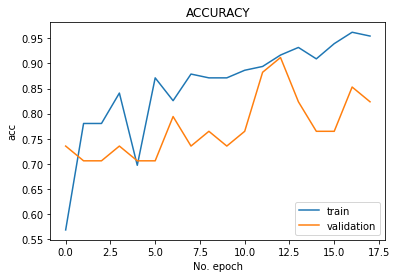

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACCURACY')
plt.ylabel('acc')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc='lower right')


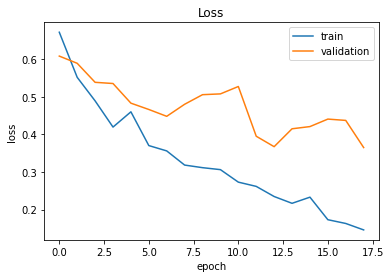

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')


In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss : ", test_loss)
print("Test Acc :", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.4205 - accuracy: 0.8571
Test Loss :  0.4204530715942383
Test Acc : 0.8571428656578064


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=")
print(confusion_mtx)

confusion matrix=
[[23  4]
 [ 2 13]]


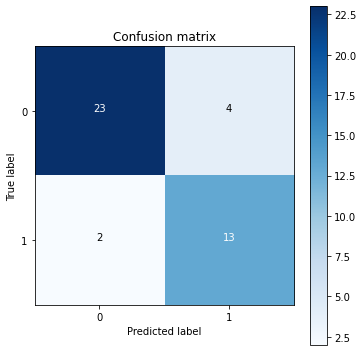

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               31232     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 32, validation_split = 0.2) 	

Epoch 1/25
5/5 [==============================] - 1s 79ms/step - loss: 0.2487 - accuracy: 0.5520 - val_loss: 0.2250 - val_accuracy: 0.5294
Epoch 2/25
5/5 [==============================] - 0s 10ms/step - loss: 0.2061 - accuracy: 0.6795 - val_loss: 0.1920 - val_accuracy: 0.6765
Epoch 3/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1762 - accuracy: 0.7255 - val_loss: 0.1776 - val_accuracy: 0.7353
Epoch 4/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1592 - accuracy: 0.7913 - val_loss: 0.1631 - val_accuracy: 0.7941
Epoch 5/25
5/5 [==============================] - 0s 10ms/step - loss: 0.1443 - accuracy: 0.8418 - val_loss: 0.1473 - val_accuracy: 0.8235
Epoch 6/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1229 - accuracy: 0.8229 - val_loss: 0.1442 - val_accuracy: 0.8235
Epoch 7/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1130 - accuracy: 0.8946 - val_loss: 0.1510 - val_accuracy: 0.7647
Epoch 8/25
5/5 [===============

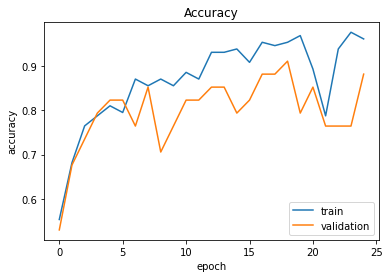

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

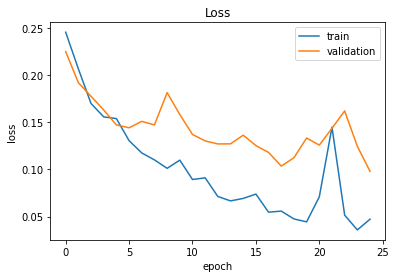

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')


In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.1142 - accuracy: 0.8333
Test Loss 0.11421868950128555
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[25  2]
 [ 5 10]]


In [ ]:
#stochastic

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 12, batch_size = 1, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               31232     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
132/132 [==============================] - 1s 4ms/step - loss: 0.7940 - accuracy: 0.6106 - val_loss: 0.5408 - val_accuracy: 0.7353
Epoch 2/12
132/132 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7677 - val_loss: 0.5460 - val_accuracy: 0.7353
Epoch 3/12
132/132 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0

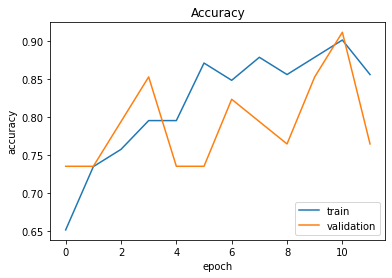

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')


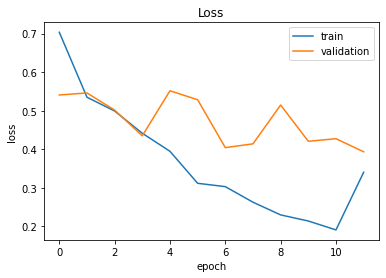

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.5753 - accuracy: 0.8095
Test Loss 0.5753465890884399
Test Accuracy 0.8095238208770752


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[19  8]
 [ 0 15]]


In [ ]:
#bach 64

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 40, batch_size = 64, validation_split = 0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               31232     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
3/3 [==============================] - 1s 118ms/step - loss: 0.7180 - accuracy: 0.4499 - val_loss: 0.6316 - val_accuracy: 0.6471
Epoch 2/40
3/3 [==============================] - 0s 17ms/step - loss: 0.6108 - accuracy: 0.6617 - val_loss: 0.5749 - val_accuracy: 0.8824
Epoch 3/40
3/3 [==============================] - 0s 16ms/step - loss: 0.5788 - accuracy: 0.7540 - 

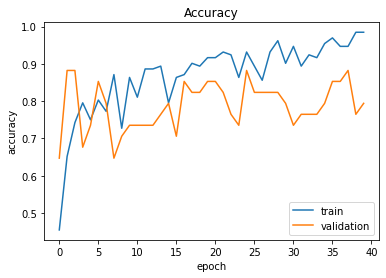

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

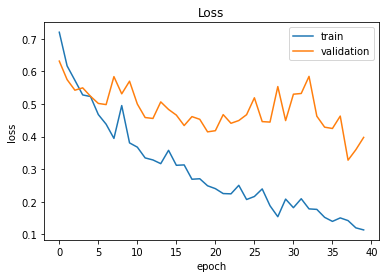

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')


In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.3552 - accuracy: 0.8571
Test Loss 0.3551674783229828
Test Accuracy 0.8571428656578064


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[24  3]
 [ 3 12]]


In [ ]:
#bach 128
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 1s 247ms/step - loss: 0.7009 - accuracy: 0.4464 - val_loss: 0.6781 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6428 - accuracy: 0.5433 - val_loss: 0.6560 - val_accuracy: 0.5588
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6383 - accuracy: 0.5765 - 

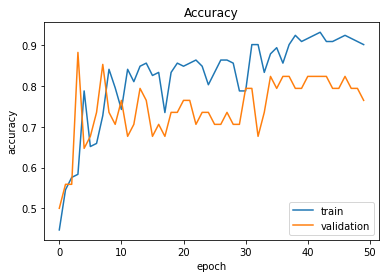

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

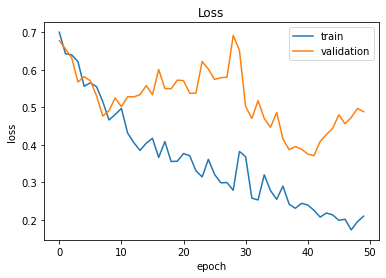

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8095
Test Loss 0.40037035942077637
Test Accuracy 0.8095238208770752


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[22  5]
 [ 3 12]]


In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 208, validation_split = 0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1/1 [==============================] - 1s 510ms/step - loss: 0.6750 - accuracy: 0.6061 - val_loss: 0.6629 - val_accuracy: 0.5294
Epoch 2/30
1/1 [==============================] - 0s 33ms/step - loss: 0.6290 - accuracy: 0.5606 - val_loss: 0.6113 - val_accuracy: 0.7353
Epoch 3/30
1/1 [==============================] - 0s 30ms/step - loss: 0.5858 - accuracy: 0.8258 -

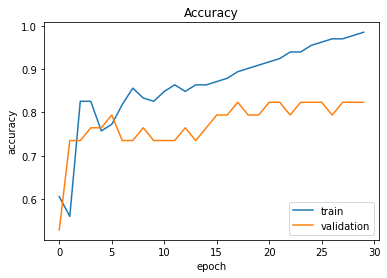

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

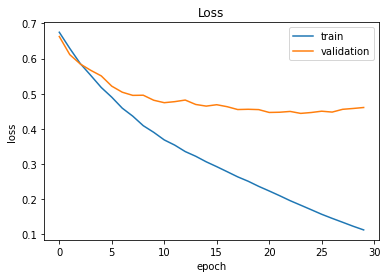

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.7857
Test Loss 0.4132138788700104
Test Accuracy 0.7857142686843872


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[21  6]
 [ 3 12]]


In [ ]:
#tanh 
model = Sequential()
model.add(Dense(512, activation = 'tanh', input_shape = (60,)))
model.add(Dense(512, activation = 'tanh'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 208, validation_split = 0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1/1 [==============================] - 1s 531ms/step - loss: 0.7075 - accuracy: 0.4545 - val_loss: 1.2932 - val_accuracy: 0.4706
Epoch 2/25
1/1 [==============================] - 0s 35ms/step - loss: 1.2160 - accuracy: 0.5152 - val_loss: 0.6437 - val_accuracy: 0.5882
Epoch 3/25
1/1 [==============================] - 0s 36ms/step - loss: 0.6143 - accuracy: 0.6212 - 

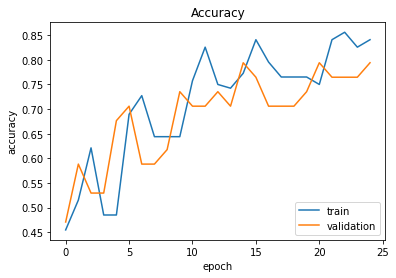

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')



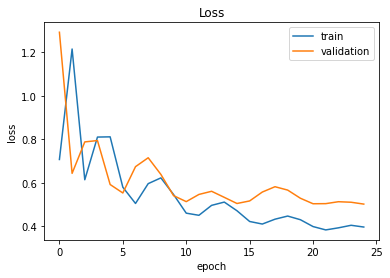

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.5102 - accuracy: 0.6905
Test Loss 0.5101635456085205
Test Accuracy 0.6904761791229248


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[17 10]
 [ 3 12]]


In [ ]:
#sigmoid
model = Sequential()
model.add(Dense(512, activation = 'sigmoid', input_shape = (60,)))
model.add(Dense(512, activation = 'sigmoid'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 120, batch_size = 208, validation_split = 0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
1/1 [==============================] - 1s 762ms/step - loss: 0.8488 - accuracy: 0.5152 - val_loss: 0.9125 - val_accuracy: 0.5294
Epoch 2/120
1/1 [==============================] - 0s 33ms/step - loss: 0.9795 - accuracy: 0.4848 - val_loss: 0.7892 - val_accuracy: 0.5294
Epoch 3/120
1/1 [==============================] - 0s 31ms/step - loss: 0.8347 - accuracy: 0.4848

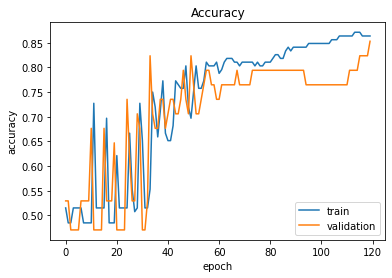

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')


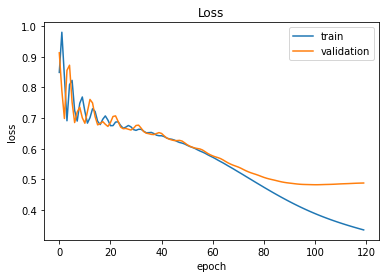

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.5029 - accuracy: 0.7619
Test Loss 0.5029429197311401
Test Accuracy 0.761904776096344


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[21  6]
 [ 4 11]]


In [ ]:
#30 epoch
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               12200     
_________________________________________________________________
dense_1 (Dense)              (None, 450)               90450     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               180400    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 323,352
Trainable params: 323,352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 4s 122ms/step - loss: 0.6710 - accuracy: 0.6233 - val_loss: 0.6401

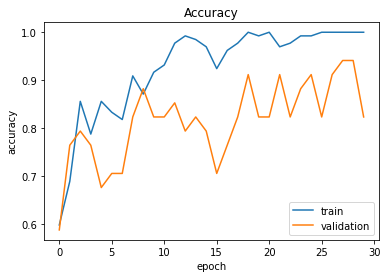

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

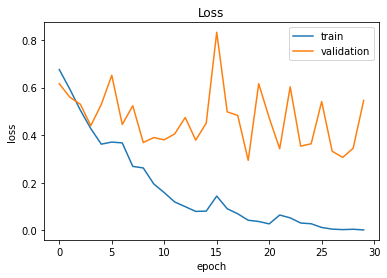

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

2/2 [==============================] - 0s 6ms/step - loss: 0.4542 - accuracy: 0.9286
Test Loss 0.45417895913124084
Test Accuracy 0.9285714030265808
confusion matrix=
 [[24  3]
 [ 0 15]]


In [ ]:
# 6 layer
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(900, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_27 (Dense)             (None, 500)               100500    
_________________________________________________________________
dense_28 (Dense)             (None, 800)               400800    
_________________________________________________________________
dense_29 (Dense)             (None, 900)               720900    
_________________________________________________________________
dense_30 (Dense)             (None, 300)               270300    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                

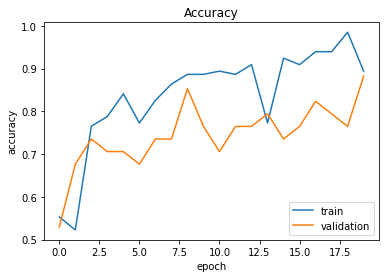

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

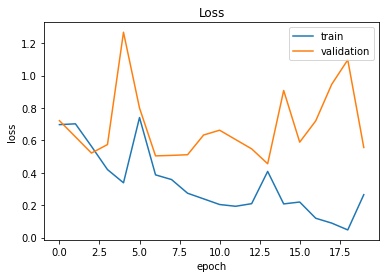

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.7685 - accuracy: 0.8333
Test Loss 0.7685147523880005
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[20  7]
 [ 0 15]]


In [ ]:
#laye haye kamtar
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 1026      
Total params: 32,258
Trainable params: 32,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 0s 55ms/step - loss: 0.6910 - accuracy: 0.4991 - val_loss: 0.6458 - val_accuracy: 0.5882
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 0.6286 - accuracy: 0.6566 - val_loss: 0.5982 - val_accuracy: 0.9118
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5911 - accuracy: 0.6651 - val_loss: 0.5871 - val_accuracy: 0.6765
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.5359 - accuracy: 0.7150

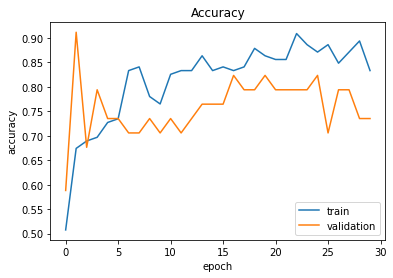

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

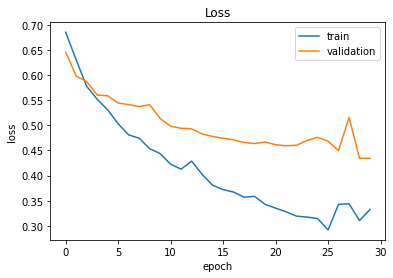

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.7857
Test Loss 0.4758601486682892
Test Accuracy 0.7857142686843872


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[19  8]
 [ 1 14]]


In [ ]:
#fewer neurons
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_36 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 602       
Total params: 73,102
Trainable params: 73,102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 1s 54ms/step - loss: 0.6798 - accuracy: 0.5538 - val_loss: 0.6330 - val_accuracy: 0.6471
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6088 - accuracy: 0.6821 - val_loss: 0.5910 - val_accuracy: 0.7353
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.7690 - val

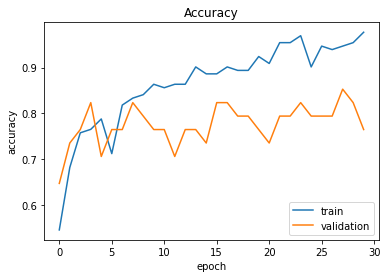

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

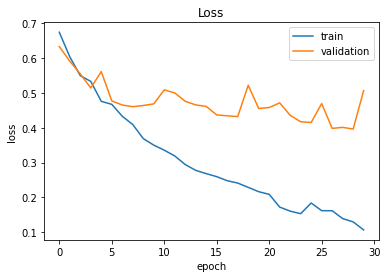

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8333
Test Loss 0.32543444633483887
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[25  2]
 [ 5 10]]
